In [1]:
# initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram


IBMQ.save_account('ad3965ae3913db06521d71bba9e1208319b91a9e7ab869744cd624d63a8e898cfef58312e0819dcc2a1a2ffa59a867a4fdf5f6e225c6f2c80f28e03d3bb1a61a',overwrite=True)

#IBMQ.save_account('ebadbf7da56bb61d559a2f5fecd3d1d6e60d13ce5dd374f801829f3c92cd864b124e1ad5c1fd3faa6a14a5365f9d326947df8db138604049b06192da43d6a49b',overwrite=True)

#IBMQ.save_account('676f27667e5b533a92387a7716d67080d9648d217e96873f767e3834c2861bd4590a7ffbff31002cbce3f215642436c9a2e3a731e24b797ed5acd92765a463c2',overwrite=True)
#IBMQ.save_account('ebadbf7da56bb61d559a2f5fecd3d1d6e60d13ce5dd374f801829f3c92cd864b124e1ad5c1fd3faa6a14a5365f9d326947df8db138604049b06192da43d6a49b',overwrite=True)



IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends() 

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [2]:
from qiskit import *

In [3]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal,CompleteMeasFitter)

In [4]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [5]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal,CompleteMeasFitter)


n=5
qr = QuantumRegister(n)
cr = ClassicalRegister(n)
    
circuit = QuantumCircuit(qr, cr)
barriers = True


            # Apply Hadamard gate
circuit.h(qr)    
    

            # Apply Z-gate 
circuit.z(qr)  

            # Apply barrier 


            # Apply Hadamard gate
circuit.h(qr) 

            # Measure the register
    
for i in range(n):
    circuit.measure(qr[i], cr[i])

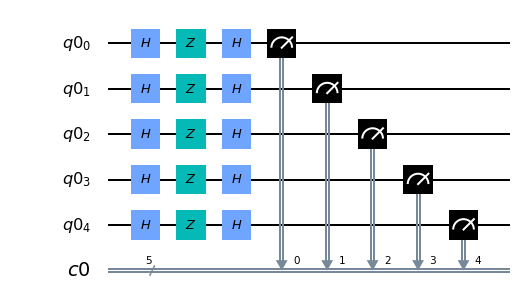

In [6]:
circuit.draw('mpl')

In [7]:
provider = IBMQ.get_provider(hub='ibm-q')
#device = provider.get_backend('ibmq_vigo')

In [8]:
FidelityFull1=[]
FidelityPartial1=[]
FidelityNoisy1=[]

JobIDFull1=[]
JobIDPartial1=[]
JobID_DJA1=[]

MatrixFull1=[]
MatrixPartial1=[]

In [14]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)
cal_circuits, state_labels = complete_meas_cal(qr=circuit.qregs[0], 
                                               circlabel='measurement_calibration')
device = provider.get_backend('ibmq_ourense')
bit='11111'

for j in range (0,14):
    
    Trials=2**j  
    #Trials=8192
    
    job = execute(circuit, backend=device, shots=Trials)
    device_result = job.result()
    a=device_result.get_counts(circuit).get(bit)
    
    
    cal_job = execute(cal_circuits,
             backend=device,
             shots=Trials,
             optimization_level=0)
    #print(cal_job.job_id())

    cal_results = cal_job.result()

    index=2**n-1
    cal_job_partial = execute(cal_circuits[index],
             backend=device,
             shots=Trials,
             optimization_level=0)
    cal_results_partial = cal_job_partial.result()
    #JobIDPartial.append(cal_job_partial.job_id())
   
    meas_fitter = CompleteMeasFitter(cal_results, state_labels)
    meas_fitter_partial = CompleteMeasFitter(cal_results_partial, state_labels)
    for k in range (2**n-1):
        meas_fitter_partial.cal_matrix[k,k]=1
        
    
    meas_filter_partial =meas_fitter_partial.filter
    mitigated_result_partial = meas_filter_partial.apply(device_result)
    mitigated_counts_partial = mitigated_result_partial.get_counts(circuit)
    
    meas_filter =meas_fitter.filter
    mitigated_result = meas_filter.apply(device_result)
    mitigated_counts = mitigated_result.get_counts(circuit)
    
    FidelityNoisy1.append(device_result.get_counts(circuit).get(bit)/Trials)
    FidelityPartial1.append(mitigated_counts_partial.get(bit)/Trials)
    FidelityFull1.append(mitigated_counts.get(bit)/Trials)
    
    JobIDFull1.append("'"+str(cal_job.job_id())+"'")
    JobIDPartial1.append("'"+str(cal_job_partial.job_id())+"'")
    JobID_DJA1.append("'"+str(job.job_id())+"'")
    
    MatrixFull1.append(meas_fitter.cal_matrix)
    MatrixPartial1.append(meas_fitter_partial.cal_matrix)

Future exception was never retrieved
future: <Future finished exception=ConnectionClosed('WebSocket connection is closed: code = 4002 (private use), no reason')>
websockets.exceptions.ConnectionClosed: WebSocket connection is closed: code = 4002 (private use), no reason


In [15]:
def MatlabStr(array):
    return '[' + "; ".join(" ".join("%6g" % val for val in line) for line in array) + ']'

In [16]:
print(FidelityFull1)
print(FidelityPartial1)
print(FidelityNoisy1)

print(JobIDFull1)
print(JobIDPartial1)
print(JobID_DJA1)

print(MatrixFull1)
print(MatrixPartial1)

[0.020985957391335443, 0.4875298857497717, 0.4999999999999823, 0.8333333325558246, 0.999999999999999, 0.7794721602309556, 0.8318433654744499, 1.0, 0.9118239680067554, 0.9636255592494629, 0.9999999999999452, 0.9181155660795334, 0.9777607004630918, 0.9555333078629196, 0.9897870732719226]
[0.9999999999999996, 0.9999999999999996, 0.9999119783236682, 0.8076923084261165, 0.7529337530668117, 0.8897060752067925, 0.7801014452294605, 0.999999999999984, 0.905705556430252, 0.9157881048700545, 0.9796917494313423, 0.9093143777475976, 0.992416070486294, 0.985984211453659, 0.9747063645799914]
[1.0, 1.0, 0.5, 0.75, 1.0, 0.6875, 0.6875, 0.859375, 0.71875, 0.69921875, 0.748046875, 0.7060546875, 0.72998046875, 0.729248046875, 0.7265625]
["'5f2b7252f0563e001a6cbca5'", "'5f2b79eb0ca1ba0011b3d4a8'", "'5f2b7acfc79cc2001a3ac91f'", "'5f2b7c870ca1ba0011b3d4d5'", "'5f2b7e33f0563e001a6cbd43'", "'5f2b7f54159e2600136cbec0'", "'5f2b80cb9b21aa001a1cab31'", "'5f2b81f70ca1ba0011b3d517'", "'5f2b8500f0563e001a6cbd91'", "'

        4.88281250e-04, 2.56347656e-02, 8.78906250e-03, 7.19238281e-01]])]
[array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.42553711e-01]])]


# Here I put the full matrices

In [17]:
for j in MatrixFull1:
    print(MatlabStr(j))

[     0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      1      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      0      1      0      1      0      0      0      0      0      0      0  

[     1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      0      1      0      0      0      0      0      0      0      0      0  

[   0.5      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0    0.5      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      0    0.5    0.5    0.5      0      0      0      0      0      0      0  

[     1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0    0.5      0      0      0      0      0      0      0   0.25      0      0      0      0      0      0      0   0.25      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      1   0.25      0   0.25   0.25      0      0      0    0.5      0      0      0      0      0      0      0   0.25      0      0      0      0      0      0      0      0      0      0      0      0      0;      0   0.25      0   0.75      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0    0.5      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      0      1      0      0      0      0      0      0      0   0.25      0  

[     1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0  0.375      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      1      0      0      0  0.125      0      0      0      0      0      0      0      0      0      0      0   0.25      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0  0.875   0.25      0      0      0      0      0      0      0      0      0  0.125      0      0      0      0      0      0      0      0  0.125      0      0      0      0      0      0      0      0      0;      0      0      0   0.75      0      0      0      0      0      0      0      0      0      0      0      0      0  0.125      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      0      1      0  0.125      0      0      0      0      0      0      0  

[ 0.875      0 0.0625      0 0.0625      0      0      0 0.0625      0      0      0      0      0      0      0 0.0625      0 0.0625      0      0      0      0      0      0      0      0      0      0      0      0      0;      0  0.875      0 0.0625      0      0      0      0      0 0.0625      0      0      0      0      0      0      0  0.125      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0 0.0625  0.875      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0  0.125      0      0      0      0      0      0      0      0      0      0      0      0      0;      0 0.0625      0  0.875      0      0      0  0.125      0      0      0 0.0625      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0; 0.0625      0      0      0 0.9375      0  0.125      0      0      0      0      0  0.125      0  

[0.90625      0      0      0 0.0625      0      0      0 0.03125      0      0      0      0      0      0      0 0.09375      0      0      0      0      0      0      0 0.03125      0      0      0      0      0      0      0; 0.03125 0.90625      0 0.03125      0      0      0      0      0 0.0625      0      0      0      0      0      0      0  0.125      0      0      0      0      0      0      0 0.09375      0      0      0      0      0      0;      0      0 0.90625      0      0 0.03125      0      0      0      0 0.0625      0      0      0      0      0      0      0 0.28125      0      0      0 0.03125      0      0      0 0.03125      0      0      0      0      0;      0 0.03125      0  0.875      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0 0.15625      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      0 0.8125      0      0      0      0      0      0      0 

[0.890625 0.015625 0.015625      0 0.046875      0      0      0 0.03125      0      0      0      0      0      0      0 0.109375      0 0.015625      0      0      0      0      0 0.015625      0      0      0      0      0      0      0; 0.015625 0.90625      0 0.0625      0 0.09375      0      0      0 0.078125      0      0      0      0      0      0      0  0.125      0      0      0 0.015625      0      0 0.015625 0.09375      0      0      0      0      0      0; 0.0625      0 0.9375 0.03125      0      0 0.015625      0      0      0 0.03125      0      0      0      0      0      0      0 0.078125      0      0      0 0.015625      0      0      0 0.046875      0      0      0      0      0;      0 0.03125      0 0.84375      0      0      0  0.125      0      0      0 0.0625      0      0      0      0      0      0      0 0.078125      0      0      0      0      0      0      0 0.03125      0      0      0      0;      0      0      0      0 0.828125 0.03125 0.03125      

[0.890625 0.0234375 0.03125      0 0.0390625      0      0      0 0.015625      0      0      0      0      0      0      0 0.101562      0      0      0      0      0      0      0 0.03125      0      0      0      0      0      0      0; 0.0078125 0.914062      0 0.0234375      0 0.015625      0      0      0 0.0546875      0      0      0      0      0      0      0 0.09375      0      0      0      0      0      0      0 0.015625      0      0      0      0      0      0;      0      0 0.898438 0.0234375      0 0.0234375 0.0390625      0 0.0078125      0 0.0546875      0      0      0 0.0078125 0.0078125 0.0078125      0 0.164062      0      0      0      0      0      0      0 0.015625      0      0      0      0      0;      0 0.0078125 0.015625 0.898438      0      0      0 0.0390625      0      0 0.015625 0.0390625      0      0      0      0      0 0.0078125      0 0.148438      0      0      0      0      0      0      0 0.0078125      0      0      0      0; 0.015625      0 

[0.871094 0.03125 0.0351562 0.00390625 0.0273438      0      0      0 0.0703125      0      0      0      0      0      0      0 0.0859375 0.00390625      0      0 0.00390625      0      0      0 0.00390625      0      0      0      0      0      0      0; 0.0117188 0.859375 0.00390625 0.0507812      0 0.015625      0      0 0.00390625 0.0507812      0 0.00390625      0 0.0078125      0      0 0.00390625 0.078125      0 0.00390625      0      0      0      0      0 0.0195312      0 0.00390625      0      0      0      0; 0.0195312      0 0.839844 0.0273438 0.00390625 0.0234375 0.0195312      0      0      0 0.0703125      0      0      0      0      0      0      0 0.164062 0.00390625      0      0 0.0078125      0      0      0 0.0117188      0      0      0      0      0;      0 0.0195312 0.0273438 0.796875      0      0      0 0.0078125      0      0 0.00390625 0.0429688      0      0      0 0.00390625      0      0      0  0.125      0      0      0 0.0117188      0      0      0 0

[0.892578 0.0136719 0.0390625 0.00195312 0.0332031      0      0      0 0.0488281      0      0      0      0      0      0      0 0.132812 0.00585938 0.00390625      0      0      0      0      0 0.00976562      0      0      0      0 0.00195312      0      0; 0.00390625 0.890625      0 0.0410156 0.00195312 0.0136719      0      0 0.00195312 0.0566406      0      0      0      0      0 0.00195312 0.00195312 0.130859      0 0.00390625      0 0.00585938      0      0      0 0.00585938      0      0      0      0      0      0; 0.0195312      0 0.894531 0.0351562      0 0.00585938 0.0292969 0.00390625      0      0 0.0566406 0.00195312      0      0 0.00195312      0 0.00585938      0 0.105469 0.00195312      0      0 0.0078125      0      0      0 0.00585938      0      0 0.00195312      0      0;      0 0.0253906 0.0117188 0.847656      0      0      0 0.0234375 0.00195312      0      0 0.0507812      0      0      0 0.00195312      0 0.00195312      0 0.117188      0      0      0 0.0

[0.885742 0.0263672 0.0400391      0 0.0244141 0.00292969 0.00195312      0 0.0517578 0.000976562 0.000976562 0.00195312 0.00292969      0      0      0 0.116211 0.00390625 0.00488281 0.000976562 0.00292969 0.000976562      0      0 0.0078125 0.000976562      0      0      0      0      0      0; 0.00878906 0.869141      0 0.0439453      0 0.0205078      0 0.000976562      0 0.0546875 0.000976562 0.000976562      0 0.000976562      0      0 0.00195312 0.128906      0 0.00585938      0 0.00585938      0      0 0.00292969 0.00585938      0      0      0      0      0      0; 0.0361328 0.00292969 0.867188 0.0273438 0.000976562 0.00976562 0.03125 0.000976562 0.000976562 0.000976562 0.0546875 0.00195312      0      0 0.00195312      0 0.00292969 0.000976562 0.0966797 0.00195312      0 0.000976562 0.00195312      0 0.00195312      0 0.00878906      0      0      0      0      0;      0 0.0234375 0.0136719 0.861328      0 0.00195312 0.000976562 0.0283203      0      0 0.00390625 0.0449219    

[0.890625 0.0273438 0.0361328 0.00146484 0.0307617 0.000976562 0.000976562      0 0.0458984 0.00195312 0.00244141      0 0.000976562      0      0      0 0.107422 0.00439453 0.00488281 0.000488281 0.00390625 0.000488281      0      0 0.0151367      0 0.00146484 0.000488281 0.00146484      0      0      0; 0.0107422 0.871582 0.000976562 0.0483398 0.000488281 0.03125      0 0.00146484 0.00146484 0.050293      0 0.000976562      0 0.00146484      0      0 0.00292969 0.120605      0 0.00439453      0 0.00146484      0      0      0 0.0175781      0      0      0 0.000976562      0      0; 0.0297852 0.000976562 0.888184 0.0214844 0.00195312 0.0102539 0.0297852 0.00146484 0.00292969      0 0.0566406 0.00146484      0 0.000976562 0.00292969      0 0.00390625      0 0.104492 0.00390625 0.000488281 0.000976562 0.00341797 0.000488281 0.000488281      0 0.0078125      0      0      0      0      0;      0 0.0263672 0.00927734 0.86084      0 0.00292969      0 0.0302734      0 0.000976562 0.0034179

[0.871582 0.0185547 0.0405273 0.00244141 0.0246582 0.00244141 0.000732422      0 0.045166 0.0012207 0.00170898 0.000244141 0.000732422      0      0      0 0.114502 0.00439453 0.00488281      0 0.00244141 0.000488281 0.000488281      0 0.00976562      0 0.0012207      0 0.000732422      0      0      0; 0.0146484 0.875488 0.000732422 0.0410156 0.000488281 0.0239258      0 0.00219727 0.00170898 0.0478516      0 0.00341797      0 0.000976562      0      0 0.000976562 0.100586 0.000244141 0.00366211      0 0.00390625      0      0 0.000732422 0.0100098      0 0.000244141      0 0.000244141      0      0; 0.0334473 0.00195312 0.868164 0.0202637 0.000976562 0.00976562 0.0229492 0.000488281 0.00195312      0 0.0458984 0.00170898      0 0.000732422 0.000976562      0 0.00219727      0 0.0983887 0.00219727 0.000244141 0.0012207 0.00341797      0 0.000244141      0 0.0117188 0.000244141      0      0 0.000732422      0; 0.000976562 0.0266113 0.0144043 0.862305 0.000244141 0.00317383 0.000488281

[0.89856 0.0274658 0.0404053 0.0012207 0.0428467 0.000610352 0.00244141 0.00012207 0.0446777 0.0012207 0.00280762      0 0.00183105      0      0      0 0.138306 0.00427246 0.00634766 0.000488281 0.0065918 0.00012207 0.000244141      0 0.012207 0.000244141 0.000610352      0 0.000610352      0 0.00012207      0; 0.00964355 0.883423 0.000488281 0.0422363 0.000488281 0.0380859      0 0.00183105 0.00183105 0.050293 0.000244141 0.00158691      0 0.00158691      0 0.00012207 0.00158691 0.133667 0.000366211 0.00683594      0 0.0078125      0 0.000366211 0.000366211 0.0123291      0 0.000244141 0.00012207 0.000244141      0      0; 0.022583 0.000732422 0.887329 0.0244141 0.000854492 0.0119629 0.0446777 0.00146484 0.00109863 0.000244141 0.0454102 0.00170898      0 0.000732422 0.00219727 0.00012207 0.00366211 0.00012207 0.138428 0.00415039 0.00012207 0.00158691 0.00610352 0.000244141 0.000488281      0 0.010376 0.000244141      0      0 0.000732422      0; 0.000366211 0.0219727 0.00793457 0.859

# Here the partial

In [18]:
for j in MatrixPartial1:
    print(MatlabStr(j))

[     1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      0      1      0      0      0      0      0      0      0      0      0  

[     1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      0      1      0      0      0      0      0      0      0      0      0  

[     1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      0      1      0      0      0      0      0      0      0      0      0  

[     1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      0      1      0      0      0      0      0      0      0      0      0  

[     1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      0      1      0      0      0      0      0      0      0      0      0  

[     1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      0      1      0      0      0      0      0      0      0      0      0  

[     1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      0      1      0      0      0      0      0      0      0      0      0  

[     1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      0      1      0      0      0      0      0      0      0      0      0  

[     1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      0      1      0      0      0      0      0      0      0      0      0  

[     1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      0      1      0      0      0      0      0      0      0      0      0  

[     1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0 0.00195312;      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      0      1      0      0      0      0      0      0      0      0     

[     1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      0      1      0      0      0      0      0      0      0      0      0  

[     1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      0      1      0      0      0      0      0      0      0      0      0  

[     1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      0      1      0      0      0      0      0      0      0      0      0  

[     1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0;      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0 0.000244141;      0      0      0      0      1      0      0      0      0      0      0      0      0    